In [1]:
import numpy as np 
import pandas as pd 
import os 
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
import pickle 

In [ ]:
# COMPUTE CONTACT POINT DISCREPANCY 

labels = ['A','B','C','D','E'] 
pose_dims = ['x','y','z'] 
dist_matrix = np.zeros((len(labels),len(labels))) 
std_matrix = np.zeros((len(labels),len(labels))) 

dir_save = "/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/map_discrepancy"
if not os.path.exists(dir_save): 
    os.makedirs(dir_save) 

# loop through each unique combination 
for i, label_i in enumerate(labels): 
    file_i = f"/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/square_{label_i}_data/perturb_v3/processed_data/square_{label_i}_peg_contact_points_10000.csv"  
    map_i = pd.read_csv(file_i) 
    # generate kd tree 
    kdt = KDTree(map_i[pose_dims], metric='euclidean')  
    for j, label_j in enumerate(labels):  
        print(label_i, label_j)
        file_j = f"/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/square_{label_j}_data/perturb_v3/processed_data/square_{label_j}_peg_contact_points_10000.csv" 
        map_j = pd.read_csv(file_j) 
        # query the kd tree
        if label_i == label_j: 
            dist, idx = kdt.query(map_j[pose_dims],k=2) 
            dist = np.squeeze(dist[:,1]) # ignore the first element which is the distance to itself  
            idx = np.squeeze(idx[:,1]) 
        else: 
            dist, idx = kdt.query(map_j[pose_dims],k=1)  
            dist = np.squeeze(dist) # ignore the first element which is the distance to itself  
            idx = np.squeeze(idx) 
        # save values of correspondences and distances as a csv 
        poses_correspond = map_j.copy() 
        columns_j = [f"{dim}_{label_j}" for dim in pose_dims] 
        poses_correspond[columns_j] = map_i[pose_dims].iloc[idx].values  
        poses_correspond['dist'] = dist 
        dist_matrix[i,j] = np.mean(dist) 
        std_matrix[i,j] = np.std(dist) 
        poses_correspond.to_csv(os.path.join(dir_save,f"square_map_pose_correspondences_tree_{label_i}_query_{label_j}.csv")) 
        print(f"Mean contact point distance between {label_i} and {label_j}: {np.mean(dist)}") 
        print(f"Std Dev contact point distance between {label_i} and {label_j}: {np.std(dist)}") 

        # save histogram of distances 
        plt.hist(dist,bins=100) 
        plt.xlabel("Pose Distance") 
        plt.ylabel("Frequency") 
        # add mean and std dev as text to plot 
        plt.text(0.5,0.5,f"Mean: {np.mean(dist):.6f}",transform=plt.gca().transAxes) 
        plt.text(0.5,0.45,f"Std Dev: {np.std(dist):.6f}",transform=plt.gca().transAxes) 
        plt.title(f"Histogram of Pose Distances between {label_i} and {label_j}") 
        plt.savefig(os.path.join(dir_save, f"histogram_pose_distance_{label_i}_query_{label_j}.png")) 

print(dist_matrix)         

In [ ]:
map_mean_discrepancy = dist_matrix 

map_d = np.array([25.00, 24.75, 24.50, 24.25, 24.00]) 
r = (26-25)/25 
map_D = (1+r)*map_d

map_D_discrepancy = (map_d.reshape(1,5).repeat(repeats=5,axis=0) - map_d.reshape(5,1).repeat(repeats=5,axis=1) ) 
map_clearance_discrepancy = (map_D.reshape(1,5).repeat(repeats=5,axis=0) - map_d.reshape(5,1).repeat(repeats=5,axis=1) ) 

plt.figure() 
plt.scatter(map_D_discrepancy.flatten(), map_mean_discrepancy.flatten()) 
plt.xlabel("Peg Diameter Discrepancy (mm)") 
plt.ylabel("Closest Contact Point Discrepancy (mm)") 
plt.grid()
# save plot 
plt.savefig(os.path.join(dir_save, "map_mean_discrepancy_vs_D_discrepancy.png")) 

plt.figure() 
plt.scatter(map_D_discrepancy.flatten(), std_matrix.flatten()) 
plt.xlabel("Peg Diameter Discrepancy (mm)") 
plt.ylabel("Closest Contact Point Std. Dev. (mm)") 
plt.grid()
plt.savefig(os.path.join(dir_save, "map_std_discrepancy_vs_D_discrepancy.png")) 

plt.figure() 
plt.scatter(map_D_discrepancy.flatten(), map_mean_discrepancy.flatten() * np.sign(map_D_discrepancy.flatten())) 
plt.xlabel("Peg Diameter Discrepancy (mm)") 
plt.ylabel("Closest Contact Point Discrepancy (mm)") 
plt.grid()
plt.savefig(os.path.join(dir_save, "map_mean_discrepancy_vs_D_discrepancy_signed.png")) 

A A
Mean pose distance between A and A: 0.0996267293934486
Std Dev pose distance between A and A: 0.1962846798019257
A B
Mean pose distance between A and B: 0.49404578472813204
Std Dev pose distance between A and B: 0.3331040717607806
A C
Mean pose distance between A and C: 0.4929888984119358
Std Dev pose distance between A and C: 0.33288304303328997
A D
Mean pose distance between A and D: 0.49447096387939027
Std Dev pose distance between A and D: 0.3331661293587678
A E
Mean pose distance between A and E: 0.49981991836247436
Std Dev pose distance between A and E: 0.334261901765528
B A
Mean pose distance between B and A: 0.48851807465211716
Std Dev pose distance between B and A: 0.3325721055273828
B B
Mean pose distance between B and B: 0.10401661123121096
Std Dev pose distance between B and B: 0.19918779149940966
B C
Mean pose distance between B and C: 0.493462735721693
Std Dev pose distance between B and C: 0.3306863518719121
B D
Mean pose distance between B and D: 0.49446557063572755

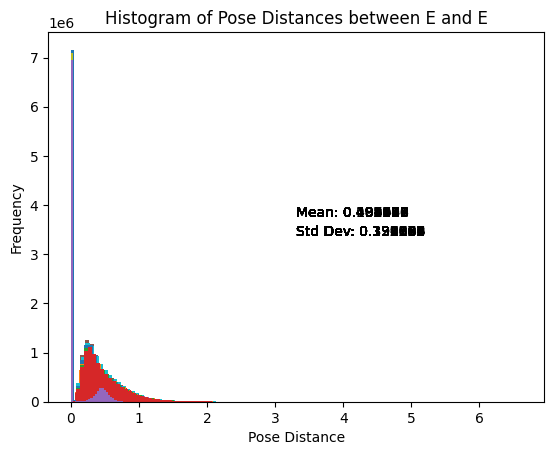

In [3]:
# COMPUTE CONTACT POSE DISCREPANCY 

labels = ['A','B','C','D','E'] 
pose_dims = ['x','y','z','a','b','c'] 
dist_matrix = np.zeros((len(labels),len(labels))) 
std_matrix = np.zeros((len(labels),len(labels))) 

dir_save = "/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/map_discrepancy"
if not os.path.exists(dir_save): 
    os.makedirs(dir_save) 

# loop through each unique combination 
for i, label_i in enumerate(labels): 
    file_i = f"/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/square_{label_i}_data/perturb_v3/processed_data/square_{label_i}_peg_contact_map_sim.csv"  
    map_i = pd.read_csv(file_i) 
    # generate kd tree 
    kdt = KDTree(map_i[pose_dims], metric='euclidean')  
    for j, label_j in enumerate(labels):  
        print(label_i, label_j)
        file_j = f"/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/square_{label_j}_data/perturb_v3/processed_data/square_{label_j}_peg_contact_map_sim.csv" 
        map_j = pd.read_csv(file_j) 
        # query the kd tree
        if label_i == label_j: 
            dist, idx = kdt.query(map_j[pose_dims],k=2) 
            dist = np.squeeze(dist[:,1]) # ignore the first element which is the distance to itself  
            idx = np.squeeze(idx[:,1]) 
        else: 
            dist, idx = kdt.query(map_j[pose_dims],k=1)  
            dist = np.squeeze(dist) 
            idx = np.squeeze(idx) 
        # save values of correspondences and distances as a csv 
        poses_correspond = map_j.copy() 
        columns_j = [f"{dim}_{label_j}" for dim in pose_dims] 
        poses_correspond[columns_j] = map_i[pose_dims].iloc[idx].values  
        poses_correspond['dist'] = dist 
        dist_matrix[i,j] = np.mean(dist) 
        std_matrix[i,j] = np.std(dist) 
        poses_correspond.to_csv(os.path.join(dir_save,f"square_map_pose_correspondences_tree_{label_i}_query_{label_j}.csv")) 
        print(f"Mean pose distance between {label_i} and {label_j}: {np.mean(dist)}") 
        print(f"Std Dev pose distance between {label_i} and {label_j}: {np.std(dist)}") 

        # save histogram of distances 
        plt.hist(dist,bins=100) 
        plt.xlabel("Pose Distance") 
        plt.ylabel("Frequency") 
        # add mean and std dev as text to plot 
        plt.text(0.5,0.5,f"Mean: {np.mean(dist):.6f}",transform=plt.gca().transAxes) 
        plt.text(0.5,0.45,f"Std Dev: {np.std(dist):.6f}",transform=plt.gca().transAxes) 
        plt.title(f"Histogram of Pose Distances between {label_i} and {label_j}") 
        plt.savefig(os.path.join(dir_save, f"histogram_pose_distance_{label_i}_query_{label_j}.png")) 

print(dist_matrix)         

(0.33, 0.34)

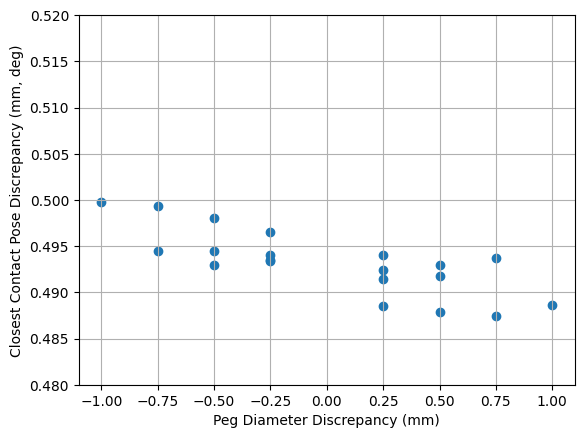

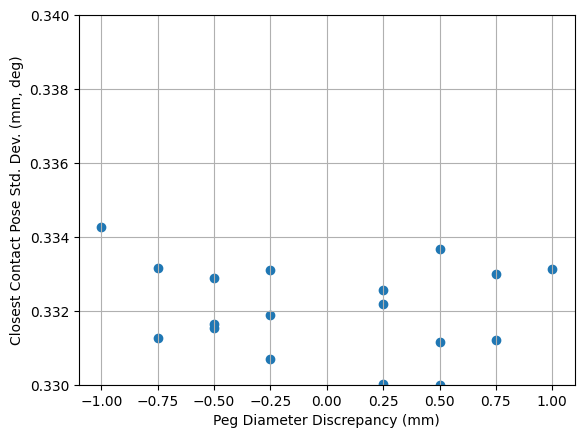

In [8]:
map_mean_discrepancy = dist_matrix 

map_d = np.array([25.00, 24.75, 24.50, 24.25, 24.00]) 
r = (26-25)/25 
map_D = (1+r)*map_d

map_D_discrepancy = (map_d.reshape(1,5).repeat(repeats=5,axis=0) - map_d.reshape(5,1).repeat(repeats=5,axis=1) ) 
map_clearance_discrepancy = (map_D.reshape(1,5).repeat(repeats=5,axis=0) - map_d.reshape(5,1).repeat(repeats=5,axis=1) ) 

plt.figure() 
plt.scatter(map_D_discrepancy.flatten(), map_mean_discrepancy.flatten()) 
plt.xlabel("Peg Diameter Discrepancy (mm)") 
plt.ylabel("Closest Contact Pose Discrepancy (mm, deg)") 
plt.grid()
# save plot 
# plt.savefig(os.path.join(dir_save, "map_mean_pose_discrepancy_vs_D_discrepancy.png")) 
plt.ylim([0.48,0.52]) 

plt.figure() 
plt.scatter(map_D_discrepancy.flatten(), std_matrix.flatten()) 
plt.xlabel("Peg Diameter Discrepancy (mm)") 
plt.ylabel("Closest Contact Pose Std. Dev. (mm, deg)") 
plt.grid()
# plt.savefig(os.path.join(dir_save, "map_std_pose_discrepancy_vs_D_discrepancy.png")) 
plt.ylim([0.33,0.34]) 